# Import Library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("../DataSets/Airbnb_Open_Data.xlsx")

# Data Cleaning

In [5]:
df.columns=df.columns.str.replace(' ','_',regex=True) #replace space into _ in all columns

In [6]:
df.dtypes

id                                  int64
NAME                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country_code                       object
instant_bookable                  float64
cancellation_policy                object
room_type                          object
Construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

In [7]:
df.isnull().sum()

id                                     0
NAME                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
Construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

In [8]:
#Drop a nan value in NAME column
df['NAME'] = df['NAME'].dropna() #code for drop columns
df.drop(df.loc[df['NAME'].isnull()].index.tolist(), inplace=True) 

In [9]:
df

,id,NAME,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,2015-06-07 00:00:00,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,2015-11-10 00:00:00,0.10,3.0,1.0,386.0,NaN,NaN


In [10]:
#host_identity_verified
df.host_identity_verified.unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [11]:
#host_name
df.host_identity_verified=df.host_identity_verified.fillna('unconfirmed')
df.host_name=df.host_name.fillna('unknown')

In [12]:
#neighbourhood_group.unique
df.neighbourhood_group.unique()
df.neighbourhood_group=df.neighbourhood_group.replace('brookln','Brooklyn')
df.neighbourhood_group=df.neighbourhood_group.replace('manhatan','Manhattan')
df.loc[df.neighbourhood_group.isnull()]
df.at[74, 'neighbourhood_group'] = 'Queens'
df.at[75, 'neighbourhood_group'] = 'Brooklyn'
df.at[76, 'neighbourhood_group']= 'Manhattan'
df.at[77, 'neighbourhood_group']= 'Manhattan'
df.at[78, 'neighbourhood_group']= 'Queens'
df.at[90, 'neighbourhood_group']= 'Queens'
df.at[91, 'neighbourhood_group']= 'Staten Island'
df.at[92, 'neighbourhood_group']= 'Brooklyn'
df.at[148, 'neighbourhood_group']= 'Manhattan'
df.at[161, 'neighbourhood_group']= 'Brooklyn'
df.at[168, 'neighbourhood_group']= 'Brooklyn'
df.at[196, 'neighbourhood_group']= 'Manhattan'
df.at[241, 'neighbourhood_group']= 'Bronx'
df.at[249, 'neighbourhood_group']= 'Brooklyn'
df.at[262, 'neighbourhood_group']= 'Bronx'
df.at[262, 'neighbourhood_group']= 'Bronx'
df.at[287, 'neighbourhood_group']= 'Brooklyn'
df.at[295, 'neighbourhood_group']= 'Manhattan'
df.at[319, 'neighbourhood_group']= 'Brooklyn'
df.at[361, 'neighbourhood_group']= 'Queens'
df.at[384, 'neighbourhood_group']= 'Bronx'
df.at[415, 'neighbourhood_group']= 'Brooklyn'
df.at[448, 'neighbourhood_group']= 'Queens'
df.at[465, 'neighbourhood_group']= 'Brooklyn'
df.at[488, 'neighbourhood_group']= 'Manhattan'
df.at[492, 'neighbourhood_group']= 'Manhattan'
df.at[40383, 'neighbourhood_group']= 'Brooklyn'
df.at[40396, 'neighbourhood_group']= 'Manhattan'
df.loc[40396]

id                                                                     23312047
NAME                              Large room near express trains & Central Park
host_id                                                             22672807843
host_identity_verified                                              unconfirmed
host_name                                                                Julian
neighbourhood_group                                                   Manhattan
neighbourhood                                                   Upper West Side
lat                                                                    40.79471
long                                                                  -73.96918
country                                                           United States
country_code                                                                 US
instant_bookable                                                            0.0
cancellation_policy                     

In [13]:
#neighbourhood
df.neighbourhood.unique()
df.loc[df.neighbourhood.isnull()]
df.at[517, 'neighbourhood']='Williomsburg'
df.at[547, 'neighbourhood']='East village'
df.at[553, 'neighbourhood']='Chinatown'
df.at[575, 'neighbourhood']='Manhattan valley'
df.at[589, 'neighbourhood']='Prospect Heights'
df.at[613, 'neighbourhood']='East Village'
df.at[624, 'neighbourhood']='Midtown'
df.at[633, 'neighbourhood']='SoWo'
df.at[643, 'neighbourhood']='Crown Heights'
df.at[670, 'neighbourhood']='Williomsburg'
df.at[678, 'neighbourhood']='Williomsburg'
df.at[681, 'neighbourhood']='Greenpoint'
df.at[726, 'neighbourhood']='Midtown'
df.at[731, 'neighbourhood']='Upper West side'
df.at[760, 'neighbourhood']='East village'
df.at[770, 'neighbourhood']='Park Slope'

In [14]:
#lat long
#Multiplevalue change 
df.loc[779, ['lat', 'long']] = ['40.6694', '-73.9438'] 
df.loc[785,['lat','long']] = ['40.7265',' -73.9815']
df.loc[799,['lat','long']] = [' 40.7358','-74.0036']
df.loc[814,['lat','long']] = ['40.7358','-74.0036']
df.loc[843,['lat','long']] = ['40.7425','-73.8780']
df.loc[885,['lat','long']] = ['40.7304','-73.9543']
df.loc[926,['lat','long']] = ['40.7401','-73.9903']
df.loc[986,['lat','long']] = ['40.7860','-73.9754']

In [15]:
#country
df.country=df.country.fillna('United States')
df.country.unique()

array(['United States'], dtype=object)

In [16]:
#countrycode
df.country_code=df.country_code.fillna('US')
df.country_code.unique()


array(['US'], dtype=object)

In [17]:
#instant_bookable
df.instant_bookable=df.instant_bookable.fillna(0.0)
df.instant_bookable=df.instant_bookable.astype('int64')
df.instant_bookable.unique()

array([0, 1], dtype=int64)

In [18]:
#cancellation_policy
df.cancellation_policy=df.cancellation_policy.fillna('Unknown')
df.cancellation_policy.unique()

array(['strict', 'moderate', 'flexible', 'Unknown'], dtype=object)

In [19]:
#Construction_year
df.Construction_year=df.Construction_year.fillna(00.)
df.Construction_year=df.Construction_year.astype('int64')
df.Construction_year.unique()

array([2020, 2007, 2005, 2009, 2013, 2015, 2004, 2008, 2010, 2019, 2018,
       2006, 2016, 2017, 2021, 2003, 2011, 2012, 2022, 2014,    0],
      dtype=int64)

In [20]:
#price
df.price = df.price.fillna('0')  # Fill NaNs with '0' (string)
df.price = df.price.astype(str)  # Ensure it's a string type
df.price= df.price.str.replace("[$,]","", regex=True)  # Remove $ and ,
df.price= df.price.str.strip()  # Remove leading/trailing spaces
df.price = df.price.astype("int64")  # Convert to int
df.price.unique()

array([ 966,  142,  620, ..., 1184,  905,  309], dtype=int64)

In [21]:
#service_fee
df.service_fee = df.service_fee.replace("[$,]","", regex=True)
df.service_fee=df.service_fee.fillna(00)
df.service_fee=df.service_fee.astype('int64')
df.service_fee.unique()

array([193,  28, 124,  41, 115,  14, 212, 204,  58,  64, 121, 143, 116,
        30,   0,  56,  95,  27, 210, 163, 235, 106,  55,  42,  86, 133,
       154, 102, 172, 109,  38, 222, 219, 202, 113,  74, 137, 171,  12,
        87, 183,  92,  73, 146, 180,  67,  51, 181,  88, 165, 129, 207,
        17,  63, 147, 105,  48, 114,  80,  23,  11, 149, 213, 211, 182,
       117,  39,  25, 216,  53,  10, 118,  72, 101,  61, 177,  49, 100,
       168,  13, 152, 126, 135,  46,  91, 199, 158, 221, 132, 189,  90,
       186,  66, 225, 220,  19, 238, 119,  98,  34, 227,  32, 148, 203,
        93, 153,  71,  77, 190,  75, 185,  97,  35,  37, 231,  82, 120,
        21, 145,  65, 144, 108, 194,  16, 217, 188,  81,  50, 176, 151,
        26,  89, 218, 104,  44,  79,  22, 131, 240, 192, 215, 191,  94,
       206, 157, 159, 233,  15, 229, 179,  85, 136, 170, 201, 175, 141,
       156, 123,  36, 198, 122, 208, 140,  68, 196,  70, 187, 228, 209,
       134,  20, 110, 234, 107, 138, 139,  31,  29,  45,  47, 16

In [22]:
#minimum_nights
df.minimum_nights=df.minimum_nights.fillna(00)
df.minimum_nights=df.minimum_nights.abs()
df.minimum_nights=df.minimum_nights.astype('int64')
df.minimum_nights.unique()

array([  10,   30,    3,   45,    2,    1,    5,    4,   90,    7,   14,
         60,    0,    9,   31,    6,   15,    8,   47,   81,  144,  371,
        149,  273,  131,  275,  323,   59,   99,  268,  189,  340,  128,
        350,  166,  110,  142,  366,  200,   50,  399,   17,   11,  452,
         13, 3455,   21,   27,   18,  365,   20,   12,   40,   44,  398,
         28,   65,   29,   55,  120,  180,  122,   19,  240,   88,  115,
        150,  370,   16,   80,  181,   26,   25,  265,  300,  185,  360,
         56,   70,   39,   24,   32,  270,   22,   75,  250,   62,   23,
       1250,  364,   74,  198,  100,  500,   43,   35,   91,  480,   53,
        160,  999,  186,   68,   93,   87,  183,  299,  175,   98,  133,
        354,   42,   33,   37,  225,  400,  105,  184,  153,  134,  222,
         58,  210,  182,  954, 5645, 2645, 1223,  114,   85,   36,   48,
        155,  307,  129,  145,   64,  333,  119,  125,   34,  458,  825],
      dtype=int64)

In [23]:
#number_of_review
df.number_of_reviews=df.number_of_reviews.fillna(00)
df.number_of_reviews=df.number_of_reviews.astype('int64')
df.number_of_reviews.unique()

array([   9,   45,    0,   74,   49,  430,  118,  160,   53,  188,  167,
        113,   27,  148,  198,  260,  130,   39,   71,   88,   19,   58,
        108,   29,  242,  197,  273,  168,  231,  214,  245,   15,   25,
         81,   97,   11,  248,   61,  135,  112,   73,   82,  328,  105,
        191,    4,  338,  106,  190,   23,   21,  142,  143,   54,   70,
         16,   94,  194,    2,  174,   24,  166,  233,   68,   46,  335,
        162,  170,  334,   12,  467,    7,   38,  324,  115,  354,  195,
         13,   36,   63,  155,  193,   32,   50,  426,  227,   84,   10,
          1,  124,  240,   30,  200,   79,   34,  134,  126,  234,  202,
         28,  309,   14,   80,  294,  150,   47,  219,  114,  213,   86,
         18,  206,  122,   52,   51,  199,    3,   41,  109,  151,  285,
        375,   33,    6,  138,  204,  253,  129,   37,   69,  192,   17,
        222,  205,  458,  189,  127,   35,  171,   92,  238,   56,  111,
        147,  177,  185,   62,  181,  333,  441,  2

In [24]:
df.isnull().sum()

id                                     0
NAME                                   0
host_id                                0
host_identity_verified                 0
host_name                              0
neighbourhood_group                    0
neighbourhood                          0
lat                                    0
long                                   0
country                                0
country_code                           0
instant_bookable                       0
cancellation_policy                    0
room_type                              0
Construction_year                      0
price                                  0
service_fee                            0
minimum_nights                         0
number_of_reviews                      0
last_review                        15857
reviews_per_month                  15843
review_rate_number                   318
calculated_host_listings_count       318
availability_365                     430
house_rules     

In [25]:
#last_review
df.last_review = pd.to_datetime(df.last_review,errors='coerce')
df.last_review.unique()

<DatetimeArray>
['2021-10-19 00:00:00', '2022-05-21 00:00:00',                 'NaT',
 '2018-11-19 00:00:00', '2019-06-22 00:00:00', '2017-05-10 00:00:00',
 '2019-06-24 00:00:00', '2017-07-21 00:00:00', '2019-09-06 00:00:00',
 '2019-06-23 00:00:00',
 ...
 '2020-04-03 00:00:00', '2020-03-03 00:00:00', '2020-02-03 00:00:00',
 '2020-01-03 00:00:00', '2020-02-29 00:00:00', '2020-02-28 00:00:00',
 '2020-02-27 00:00:00', '2020-02-26 00:00:00', '2020-02-25 00:00:00',
 '2020-02-24 00:00:00']
Length: 2475, dtype: datetime64[ns]

In [26]:
#reviews_per_month
df.reviews_per_month=df.reviews_per_month.fillna(0.0)
df.reviews_per_month=df.reviews_per_month.astype('int64')
df.reviews_per_month.unique()

array([ 0,  3,  1,  2,  4,  6,  7,  5, 10,  8, 13,  9, 11, 14, 12, 16, 19,
       17, 15, 20, 58, 27, 30, 90, 65, 47, 34, 84, 22, 25, 18, 57, 44, 26,
       24, 33], dtype=int64)

In [27]:
#review_rate_number
df.review_rate_number=df.review_rate_number.fillna(0.0)
df.review_rate_number.unique()

array([4., 5., 3., 0., 2., 1.])

In [28]:
#calculated_host_listings_count
df.calculated_host_listings_count=df.calculated_host_listings_count.fillna(0.0)
df.calculated_host_listings_count=df.calculated_host_listings_count.astype('int64')
df.calculated_host_listings_count.unique()

array([  6,   2,   1,   4,   3,   0,   5,   7,  13,  28,  11,   8,   9,
        52,  18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,
        43, 121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25,
       232,  17,  47, 103,  65,  30,  27, 327,  32,  45,  53, 208, 171,
        44,  48, 108,  51, 161, 152,  83,  24,  22, 126,  54,  66,  59,
        62, 102, 186, 125,  55,  63,  67,  58,  56,  80,  46, 218,  86,
       332], dtype=int64)

In [29]:
#availability_365
df.availability_365 = df.availability_365.fillna(0)  
df.availability_365 = df.availability_365.astype("float")  
df.availability_365 = df.availability_365.abs()  # Ensure all values are positive
df.availability_365 = df.availability_365.astype("int64") 
df.availability_365.unique()  

array([ 286,  228,  352,  289,  374,  224,  219,  180,  375,    1,  163,
        258,   47,   68,  100,  197,   96,  325,  345,  347,  193,   54,
          9,  344,  372,  103,  172,   56,  105,  169,  383,  411,   76,
        416,  294,  214,  356,  110,  354,   33,  405,   86,  152,  353,
         26,   32,   85,    0,   82,  201,  328,  393,   61,  267,  189,
         83,  400,   34,  203,   35,  280,  417,  162,  242,  227,  173,
        146,  243,  425,  113,  260,  395,  266,   58,  410,  388,   13,
         62,  366,  334,   92,   10,  378,    2,  351,  389,   16,  337,
        166,   18,  130,   43,  373,  426,  396,  419,  377,  190,  335,
         52,   70,  311,  141,  263,  200,  144,  320,   19,  293,  240,
        300,  332,  271,  156,  420,  138,  327,  124,  137,  192,   81,
        361,  341,  213,  336,   23,   78,  188,  338,   66,  322,   80,
        382,  386,  109,   12,  319,   50,  118,  350,  150,  313,  248,
        230,  145,  407,  422,   46,  101,  210,  1

In [30]:
#house_rules
df.house_rules=df.house_rules.fillna('unknown')

In [31]:
df = df.drop(columns=['license'])

In [32]:
df.isnull().sum()

id                                    0
NAME                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
Construction_year                     0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                       15857
reviews_per_month                     0
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
house_rules                           0


In [33]:
df.shape

(102329, 25)

## Exploratory Data Analysis And Visualization

In [35]:
neig_groupbypri=df.groupby("neighbourhood_group")["price"].mean().reset_index()

In [36]:
neig_groupbypri

,neighbourhood_group,price
0,Bronx,626.291097
1,Brooklyn,625.114088
2,Manhattan,620.929438
3,Queens,628.778013
4,Staten Island,623.128796


In [37]:
df.groupby("neighbourhood_group")["price"].count()

neighbourhood_group
Bronx             2707
Brooklyn         41731
Manhattan        43692
Queens           13244
Staten Island      955
Name: price, dtype: int64

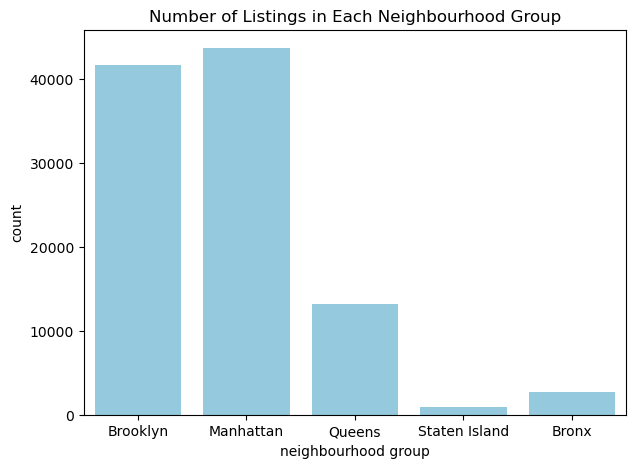


-The graph shows the number of Airbnb listings in different neighbourhood groups.
-Manhattan and Brooklyn have the highest listings, followed by Queens. 
-Bronx and Staten Island have the fewest listings, indicating lower Airbnb activity in those areas.



In [38]:
plt.figure(figsize=(7, 5))
sb.countplot(x=df.neighbourhood_group, color="skyblue")
plt.title("Number of Listings in Each Neighbourhood Group")
plt.xlabel("neighbourhood group")
plt.ylabel("count")
plt.show()

discription="""
-The graph shows the number of Airbnb listings in different neighbourhood groups.
-Manhattan and Brooklyn have the highest listings, followed by Queens. 
-Bronx and Staten Island have the fewest listings, indicating lower Airbnb activity in those areas.
"""
print(discription)


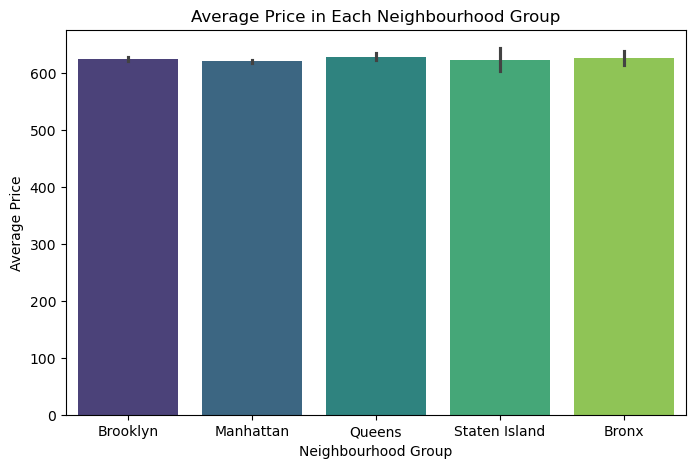


-The graph displays the average price of Airbnb listings across different neighbourhood groups.
-The prices appear to be relatively similar across all areas, with Brooklyn, Manhattan, Queens, Staten Island- 
and Bronx having almost equal average prices, suggesting uniform pricing trends in these locations.



In [39]:
plt.figure(figsize=(8, 5))
sb.barplot(x=df.neighbourhood_group, y=df.price, palette="viridis")
plt.title("Average Price in Each Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price")
plt.show()

discription="""
-The graph displays the average price of Airbnb listings across different neighbourhood groups.
-The prices appear to be relatively similar across all areas, with Brooklyn, Manhattan, Queens, Staten Island- 
and Bronx having almost equal average prices, suggesting uniform pricing trends in these locations.
"""
print(discription)








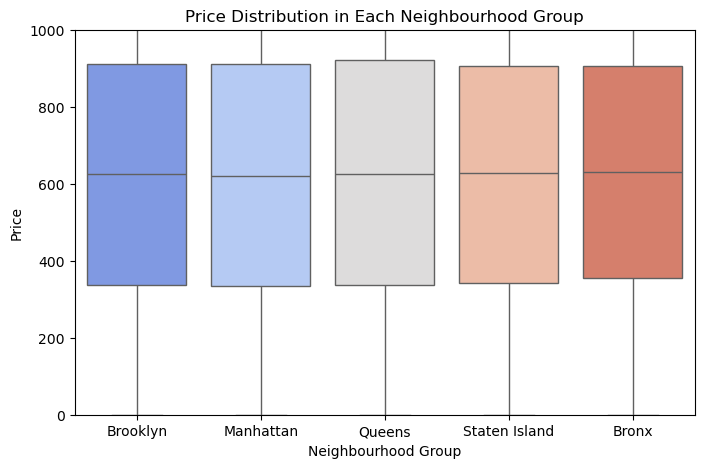


-The graph shows the price distribution of Airbnb listings across different neighbourhood groups using a box plot.
-Each box represents the median price (middle line) and the interquartile range (IQR), while the whiskers indicate the overall spread of prices.
-The distribution appears to be similar across all neighbourhood groups, suggesting a wide range of listing prices in each area.



In [40]:
plt.figure(figsize=(8, 5))
sb.boxplot(x=df["neighbourhood_group"], y=df["price"], palette="coolwarm")
plt.ylim(0, 500)  # Bahut bade outliers hatane ke liye limit set kar rahe hain
plt.title("Price Distribution in Each Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.ylim(0,1000)
plt.show()

discribe="""
-The graph shows the price distribution of Airbnb listings across different neighbourhood groups using a box plot.
-Each box represents the median price (middle line) and the interquartile range (IQR), while the whiskers indicate the overall spread of prices.
-The distribution appears to be similar across all neighbourhood groups, suggesting a wide range of listing prices in each area.
"""
print(discribe)








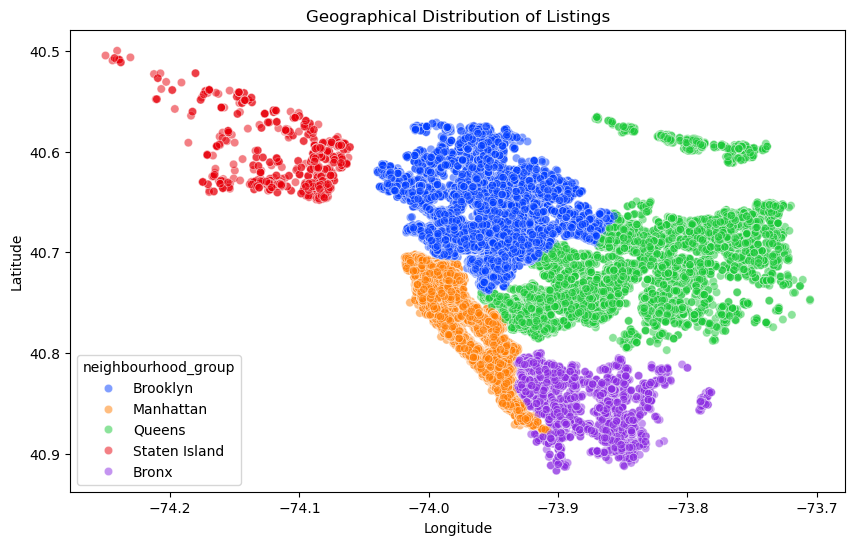


-This scatter plot visualizes the geographical distribution of Airbnb listings across different neighbourhood groups using latitude and longitude coordinates. 
-Each colour represents a different neighbourhood group, showing how listings are clustered in specific areas.
-The map highlights the dense concentration of listings in certain regions, such as Brooklyn, Manhattan, and Queens, while Staten Island and the Bronx have relatively fewer listings.



In [41]:
plt.figure(figsize=(10, 6))
sb.scatterplot(x=df.long, y=df.lat, hue=df.neighbourhood_group, palette="bright", alpha=0.5) #hue is used to assing different different color #alpha is used to point transparency level
plt.title("Geographical Distribution of Listings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

discribe="""
-This scatter plot visualizes the geographical distribution of Airbnb listings across different neighbourhood groups using latitude and longitude coordinates. 
-Each colour represents a different neighbourhood group, showing how listings are clustered in specific areas.
-The map highlights the dense concentration of listings in certain regions, such as Brooklyn, Manhattan, and Queens, while Staten Island and the Bronx have relatively fewer listings.
"""
print(discribe)








In [42]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

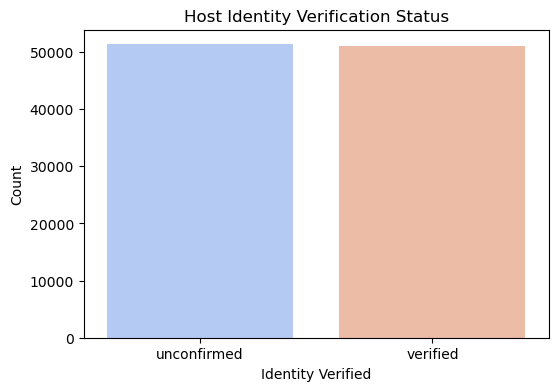


-This bar chart represents the host identity verification status of Airbnb listings.
-It shows the number of hosts whose identities are either verified or unconfirmed. 
-The counts for both categories are nearly equal, indicating that while many hosts have completed identity verification,a significant number still remain unverified.
-This insight can help in assessing trust levels on the platform.



In [43]:
plt.figure(figsize=(6, 4))
sb.countplot(x=df.host_identity_verified, palette="coolwarm")
plt.title("Host Identity Verification Status")
plt.xlabel("Identity Verified")
plt.ylabel("Count")
plt.show()

discription="""
-This bar chart represents the host identity verification status of Airbnb listings.
-It shows the number of hosts whose identities are either verified or unconfirmed. 
-The counts for both categories are nearly equal, indicating that while many hosts have completed identity verification,a significant number still remain unverified.
-This insight can help in assessing trust levels on the platform.
"""

print(discription)









In [44]:
grouped_data = df.groupby("host_identity_verified")["price"].mean().reset_index()
print(grouped_data)


  host_identity_verified       price
0            unconfirmed  625.337339
1               verified  622.280133


In [45]:
df.host_name.nunique()

13183

In [46]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [47]:
df.instant_bookable.unique()

array([0, 1], dtype=int64)

In [48]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

 1) Average Price by Room Type
 -This bar chart shows the average price of Airbnb listings by room type.
 -Entire Homes tend to have higher prices, while Shared Rooms are cheaper.
 -Helps hosts and travelers understand price distribution.

 2) Total Listings by Room Type
 -This bar chart displays the number of Airbnb listings categorized by room type.
 -The most common listings are typically Entire Homes or Private Rooms.
 -Helps hosts position their properties better.

 3) Average Reviews by Room Type
 -This graph shows the average number of reviews each room type receives.
 -Room types with higher reviews indicate better engagement with guests.
 -Helps property owners assess which type of listing gets more guest interactions.

 4) Average Availability by Room Type
 -This chart displays the average number of available days per year for each room type.
 -A lower number means the listings are frequently booked, indicating high demand.
 -Helps hosts understand which room types are most f

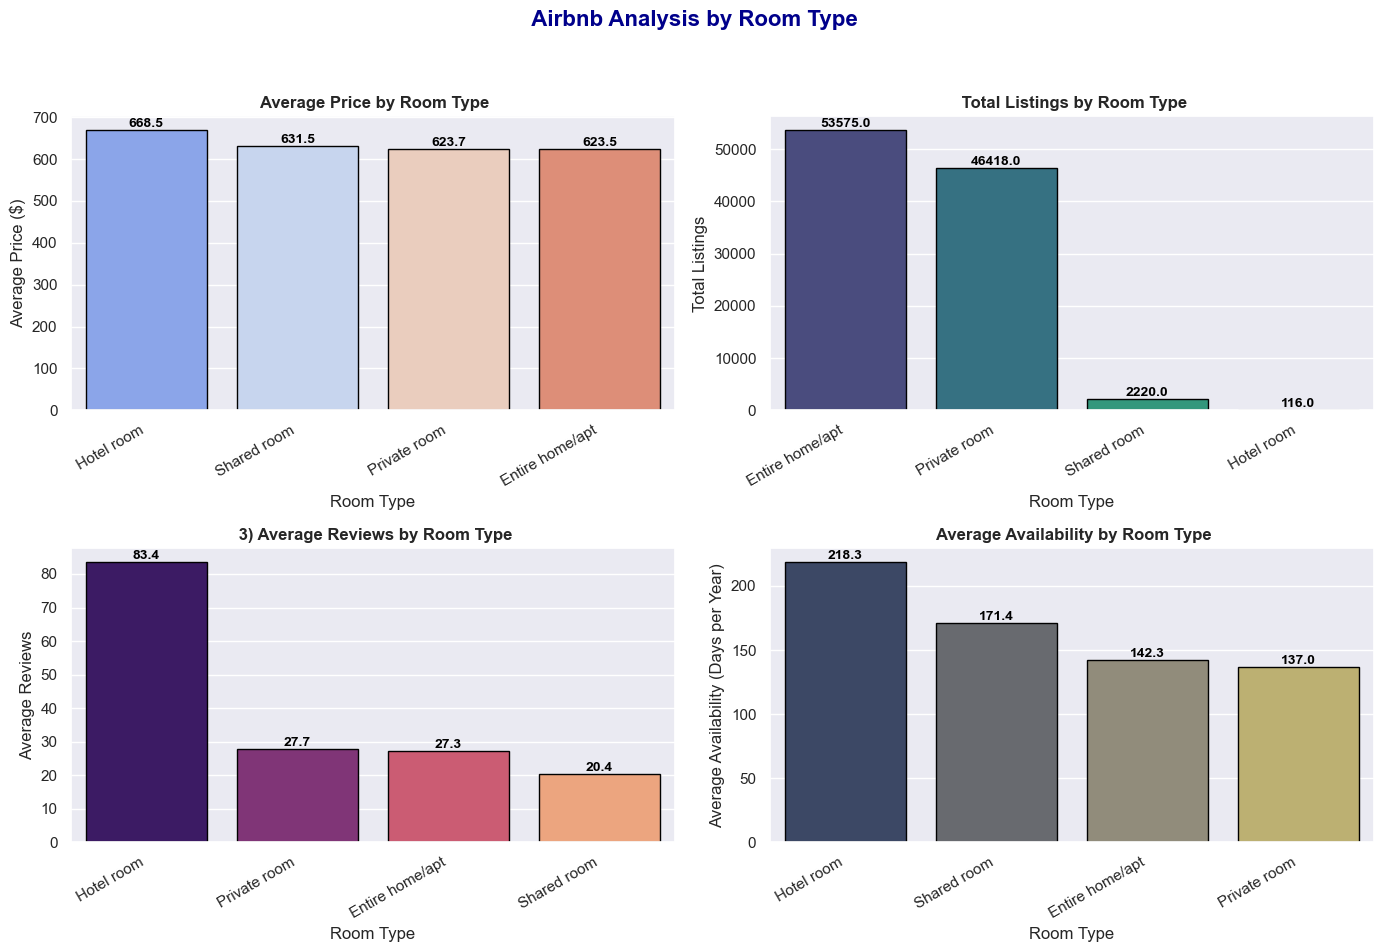

In [49]:

# Convert necessary columns to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors="coerce")
df["availability_365"] = pd.to_numeric(df["availability_365"], errors="coerce")

# Grouping data
grouped_price = df.groupby("room_type")["price"].mean().reset_index().sort_values(by="price", ascending=False)
grouped_listings = df["room_type"].value_counts().reset_index()
grouped_listings.columns = ["room_type", "total_listings"]
grouped_reviews = df.groupby("room_type")["number_of_reviews"].mean().reset_index().sort_values(by="number_of_reviews", ascending=False)
grouped_availability = df.groupby("room_type")["availability_365"].mean().reset_index().sort_values(by="availability_365", ascending=False)

# Set theme for better visualization
sb.set_theme(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(" Airbnb Analysis by Room Type", fontsize=16, fontweight="bold", color="darkblue")

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Plot 1: Average Price by Room Type

ax1 = sb.barplot(ax=axes[0, 0], x="room_type", y="price", data=grouped_price, palette="coolwarm", edgecolor="black")
axes[0, 0].set_title(" Average Price by Room Type", fontsize=12, fontweight="bold")
axes[0, 0].set_xlabel("Room Type")
axes[0, 0].set_ylabel("Average Price ($)")
add_value_labels(ax1)

print(" 1) Average Price by Room Type")
print(" -This bar chart shows the average price of Airbnb listings by room type.")
print(" -Entire Homes tend to have higher prices, while Shared Rooms are cheaper.")
print(" -Helps hosts and travelers understand price distribution.\n")


# Plot 2: Total Listings by Room Type

ax2 = sb.barplot(ax=axes[0, 1], x="room_type", y="total_listings", data=grouped_listings, palette="viridis", edgecolor="black")
axes[0, 1].set_title(" Total Listings by Room Type", fontsize=12, fontweight="bold")
axes[0, 1].set_xlabel("Room Type")
axes[0, 1].set_ylabel("Total Listings")
add_value_labels(ax2)

print(" 2) Total Listings by Room Type")
print(" -This bar chart displays the number of Airbnb listings categorized by room type.")
print(" -The most common listings are typically Entire Homes or Private Rooms.")
print(" -Helps hosts position their properties better.\n")


# Plot 3: Average Reviews by Room Type

ax3 = sb.barplot(ax=axes[1, 0], x="room_type", y="number_of_reviews", data=grouped_reviews, palette="magma", edgecolor="black")
axes[1, 0].set_title(" 3) Average Reviews by Room Type", fontsize=12, fontweight="bold")
axes[1, 0].set_xlabel("Room Type")
axes[1, 0].set_ylabel("Average Reviews")
add_value_labels(ax3)

print(" 3) Average Reviews by Room Type")
print(" -This graph shows the average number of reviews each room type receives.")
print(" -Room types with higher reviews indicate better engagement with guests.")
print(" -Helps property owners assess which type of listing gets more guest interactions.\n")


# Plot 4: Average Availability by Room Type

ax4 = sb.barplot(ax=axes[1, 1], x="room_type", y="availability_365", data=grouped_availability, palette="cividis", edgecolor="black")
axes[1, 1].set_title(" Average Availability by Room Type", fontsize=12, fontweight="bold")
axes[1, 1].set_xlabel("Room Type")
axes[1, 1].set_ylabel("Average Availability (Days per Year)")
add_value_labels(ax4)

print(" 4) Average Availability by Room Type")
print(" -This chart displays the average number of available days per year for each room type.")
print(" -A lower number means the listings are frequently booked, indicating high demand.")
print(" -Helps hosts understand which room types are most frequently occupied.\n")

# Rotate labels for better readability
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust spacing to fit title
plt.show()


In [50]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

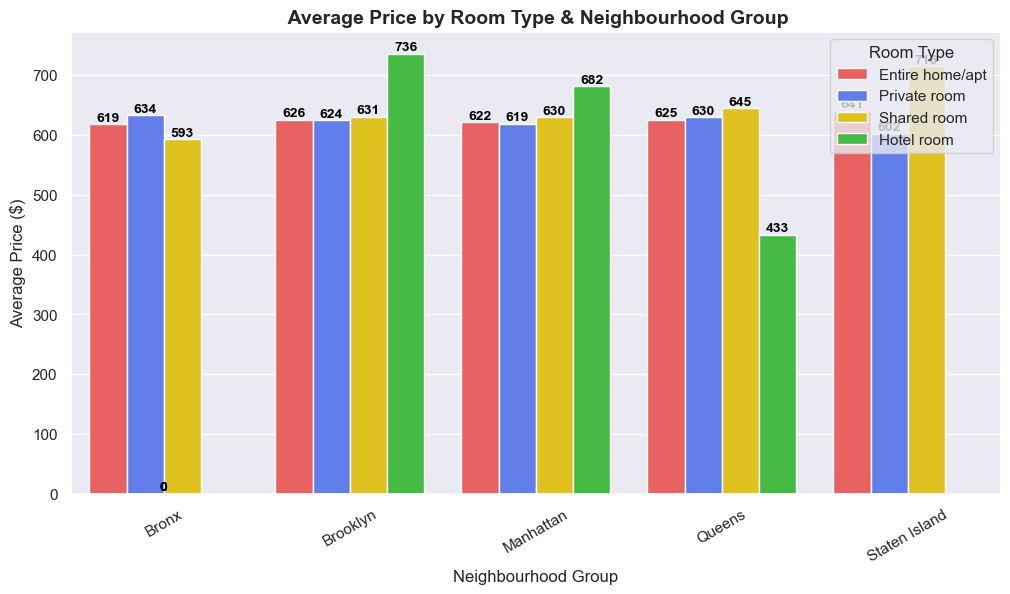

**Graph Insights:**
 -This graph displays the average price of Airbnb listings across different neighbourhood groups.
 -Hotel rooms in Manhattan have the highest average price, reflecting its prime location.
 -Shared rooms generally have lower prices, making them an affordable option for travelers.
 -The Bronx and Staten Island have the most budget-friendly listings.
 -Price variations indicate market demand and business potential for different room types.
 -Hosts can use these insights to adjust pricing strategies and maximize revenue.
 -Neighborhood pricing trends help guests and hosts make informed booking decisions.


In [51]:
# Grouping Data
revenue_insight = df.groupby(["neighbourhood_group", "room_type"]).agg({
    "price": "mean",
    "service_fee": "mean",
    "id": "count"  # Total listings
}).reset_index()
revenue_insight.rename(columns={"id": "total_listings"}, inplace=True)

# Visualization
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=revenue_insight, x="neighbourhood_group", y="price", hue="room_type", 
                palette=["#FF4C4C", "#4C72FF", "#FFD700", "#32CD32"])

# Function to Add Labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.0f}',  # Convert value to integer
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Position
        ha="center", va="bottom",  # Alignment
        fontsize=10, fontweight="bold", color="black"
    )

plt.title(" Average Price by Room Type & Neighbourhood Group", fontsize=14, fontweight="bold")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=30)
plt.legend(title="Room Type")
plt.show()

print("**Graph Insights:**")
print(" -This graph displays the average price of Airbnb listings across different neighbourhood groups.")
print(" -Hotel rooms in Manhattan have the highest average price, reflecting its prime location.")
print(" -Shared rooms generally have lower prices, making them an affordable option for travelers.")
print(" -The Bronx and Staten Island have the most budget-friendly listings.")
print(" -Price variations indicate market demand and business potential for different room types.")
print(" -Hosts can use these insights to adjust pricing strategies and maximize revenue.")
print(" -Neighborhood pricing trends help guests and hosts make informed booking decisions.")




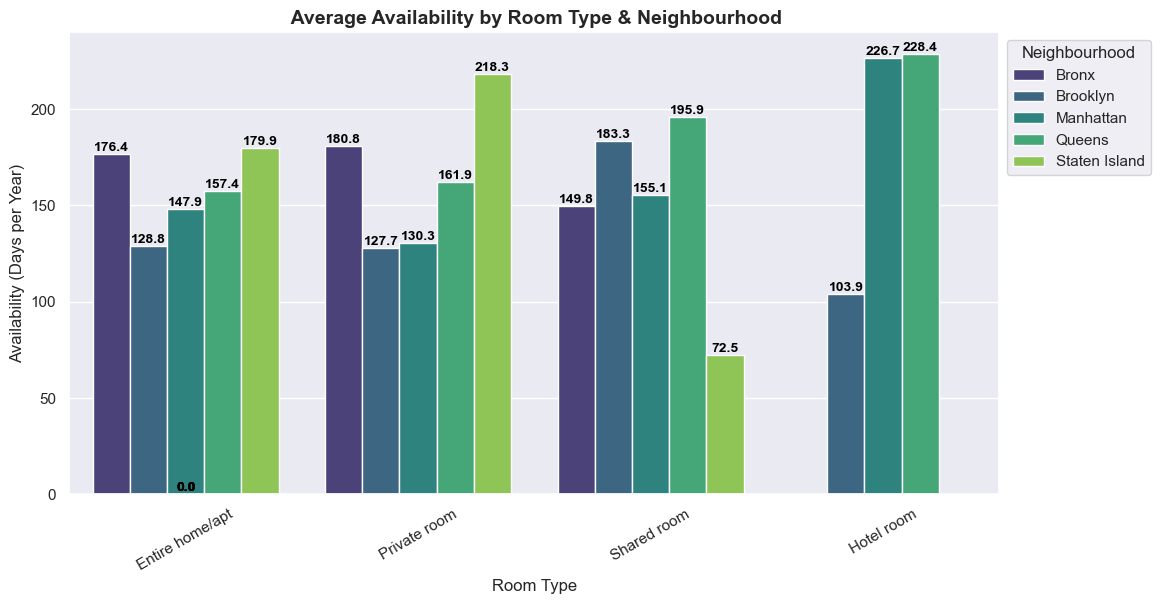


 *Graph Insights:*
   -The graph shows the average number of days listings are available per year across room types and neighbourhoods.
   -Hotel rooms have the **highest availability**, especially in **Manhattan and Queens** (over **225 days**).
   -Shared rooms also have relatively high availability, especially in **Queens and Manhattan**.
   -**Entire homes/apartments** have moderate availability, with **Bronx and Staten Island** having higher averages.
   -**Brooklyn and Queens** have more **private room availability** compared to other neighbourhoods.
   -The **variation in availability** highlights seasonal demand and **host strategies** in different areas.
   -**High availability listings** might indicate **long-term rental opportunities or consistent demand**.



In [52]:
# Grouping Data
demand_supply = df.groupby(["neighbourhood_group", "room_type"]).agg({
    "calculated_host_listings_count": "sum",
    "reviews_per_month": "mean",
    "review_rate_number": "mean",
    "availability_365": "mean"  # Fix: Added this column for visualization
}).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=demand_supply, x="room_type", y="availability_365", hue="neighbourhood_group", palette="viridis")

# Title and Labels
plt.title(" Average Availability by Room Type & Neighbourhood", fontsize=14, fontweight="bold")
plt.xlabel("Room Type")
plt.ylabel("Availability (Days per Year)")
plt.xticks(rotation=30)
plt.legend(title="Neighbourhood", bbox_to_anchor=(1, 1))

# Function to Add Value Labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Apply Labels
add_value_labels(ax)
plt.show()

# Description
description = """
 *Graph Insights:*
   -The graph shows the average number of days listings are available per year across room types and neighbourhoods.
   -Hotel rooms have the **highest availability**, especially in **Manhattan and Queens** (over **225 days**).
   -Shared rooms also have relatively high availability, especially in **Queens and Manhattan**.
   -**Entire homes/apartments** have moderate availability, with **Bronx and Staten Island** having higher averages.
   -**Brooklyn and Queens** have more **private room availability** compared to other neighbourhoods.
   -The **variation in availability** highlights seasonal demand and **host strategies** in different areas.
   -**High availability listings** might indicate **long-term rental opportunities or consistent demand**.
"""
print(description)

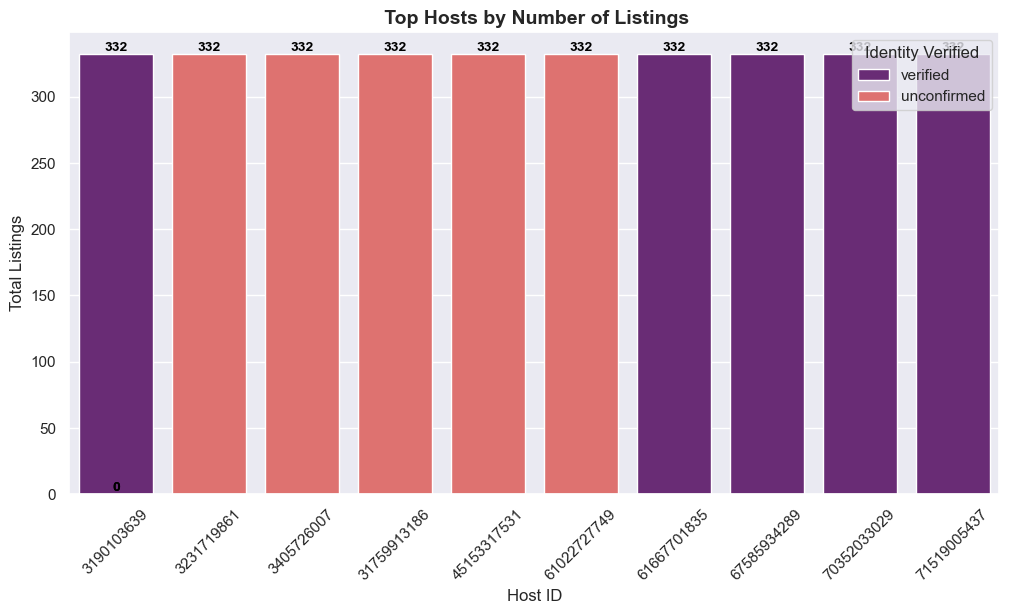


 **Graph Insights:**
   -The graph displays the **top 10 hosts** with the **highest number of listings**.
   -Each bar represents a host, categorized by **identity verification status** (Verified/Unconfirmed).
   -The **majority of top hosts** have around **332 listings**, suggesting possible property management businesses.
   -Hosts with **verified identities** (purple bars) have a significant presence.
   -Some **unconfirmed identity hosts** (orange bars) also have a **high number of listings**.
   -The data highlights **bulk property management trends in the Airbnb market**.



In [53]:
# Grouping Data
host_performance = df.groupby(["host_id", "host_identity_verified"]).agg({
    "calculated_host_listings_count": "sum",
    "reviews_per_month": "mean",
    "review_rate_number": "mean"
}).reset_index()

# Top Hosts
top_hosts = host_performance.sort_values(by="calculated_host_listings_count", ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
ax = sb.barplot(data=top_hosts, x="host_id", y="calculated_host_listings_count", hue="host_identity_verified", palette="magma")

# Function to Add Value Labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0f}",  # Convert height to integer
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Add Labels
add_value_labels(ax)  # Fix: Function ko call kiya

# Graph Labels and Titles
plt.title(" Top Hosts by Number of Listings", fontsize=14, fontweight="bold")
plt.xlabel("Host ID")
plt.ylabel("Total Listings")
plt.xticks(rotation=45)
plt.legend(title="Identity Verified")
plt.show()

# Description
description = """
 **Graph Insights:**
   -The graph displays the **top 10 hosts** with the **highest number of listings**.
   -Each bar represents a host, categorized by **identity verification status** (Verified/Unconfirmed).
   -The **majority of top hosts** have around **332 listings**, suggesting possible property management businesses.
   -Hosts with **verified identities** (purple bars) have a significant presence.
   -Some **unconfirmed identity hosts** (orange bars) also have a **high number of listings**.
   -The data highlights **bulk property management trends in the Airbnb market**.
"""

print(description)

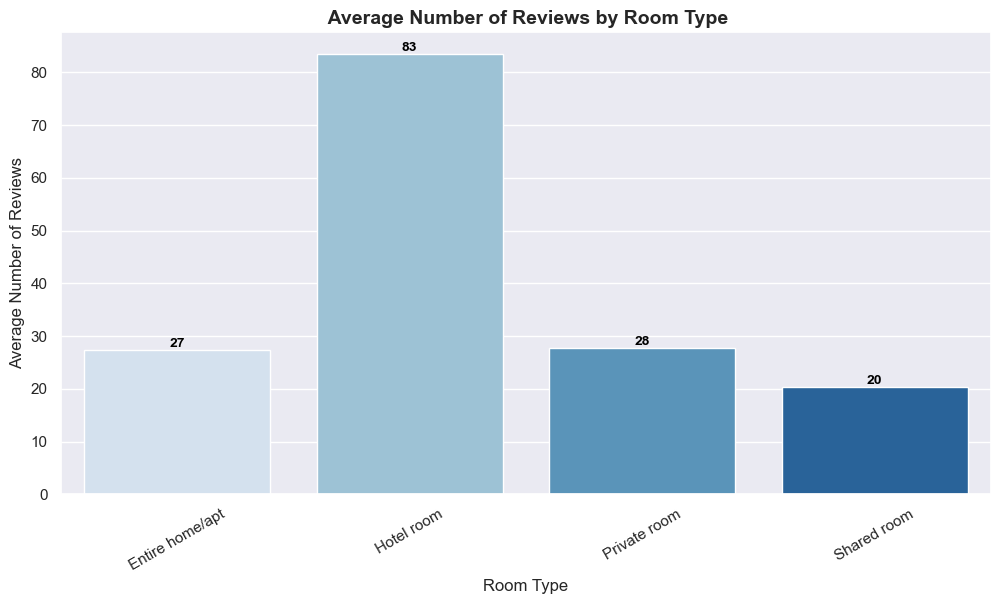

**Graph Insights:**
 -This graph represents the average number of reviews for each Airbnb room type.
 -Hotel rooms receive the highest number of reviews, indicating frequent guest stays.
 -Entire homes and private rooms have fewer reviews, possibly due to longer stays.
 -Shared rooms have the lowest reviews, suggesting lower demand or longer booking gaps.
 -Higher reviews indicate more guest engagement and satisfaction for a particular room type.
 -This analysis helps hosts understand which room types attract more guest feedback.
 -Hosts can use this insight to improve listing performance and guest experience.


In [54]:
# Grouping Data
guest_reviews = df.groupby("room_type").agg({
    "number_of_reviews": "mean",
    "review_rate_number": "mean"
}).reset_index()

# Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create Barplot First
sb.barplot(data=guest_reviews, x="room_type", y="number_of_reviews", palette="Blues", ax=ax1)

# Function to Add Value Labels
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0f}",  # Convert height to integer
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=10, fontweight="bold", color="black")

# Now Add Labels After Creating Barplot
add_value_labels(ax1)  

# Graph Labels and Titles
ax1.set_title(" Average Number of Reviews by Room Type", fontsize=14, fontweight="bold")
ax1.set_xlabel("Room Type")
ax1.set_ylabel("Average Number of Reviews")
plt.xticks(rotation=30)
plt.show()

# Description
print("**Graph Insights:**")
print(" -This graph represents the average number of reviews for each Airbnb room type.")
print(" -Hotel rooms receive the highest number of reviews, indicating frequent guest stays.")
print(" -Entire homes and private rooms have fewer reviews, possibly due to longer stays.")
print(" -Shared rooms have the lowest reviews, suggesting lower demand or longer booking gaps.")
print(" -Higher reviews indicate more guest engagement and satisfaction for a particular room type.")
print(" -This analysis helps hosts understand which room types attract more guest feedback.")
print(" -Hosts can use this insight to improve listing performance and guest experience.")


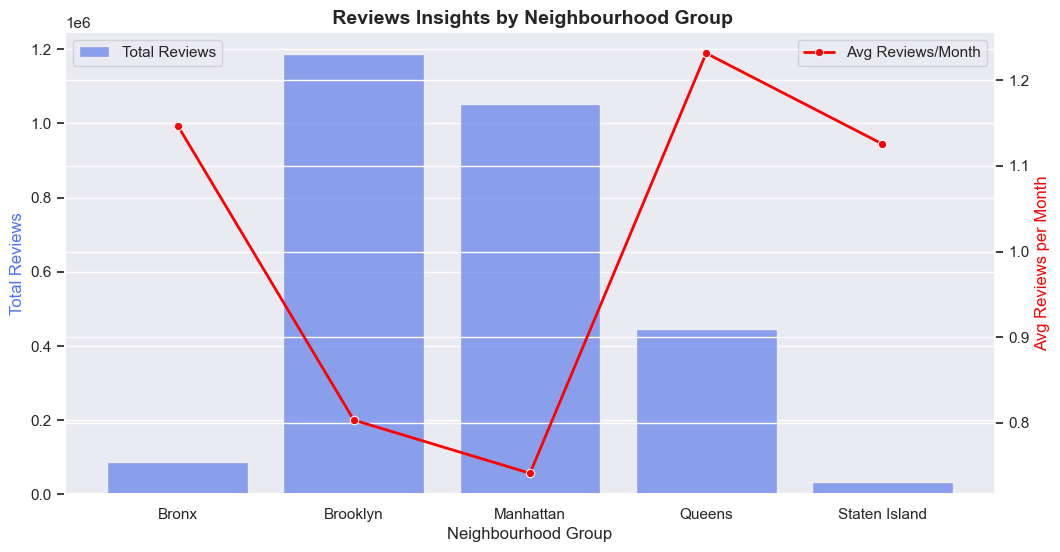


 **Graph 1 Description:**
 - This graph shows the total number of reviews for each neighborhood group (bars).
 - The red line represents the average reviews per month, indicating engagement levels.
 - A higher number of total reviews suggests a popular neighborhood among guests.
 - If avg reviews per month are high, it means consistent bookings and reviews.
 - Some areas may have high total reviews but low recent activity.
 - Useful for hosts to optimize pricing and marketing strategies.
 - Helps Airbnb understand which areas have the most active guests.



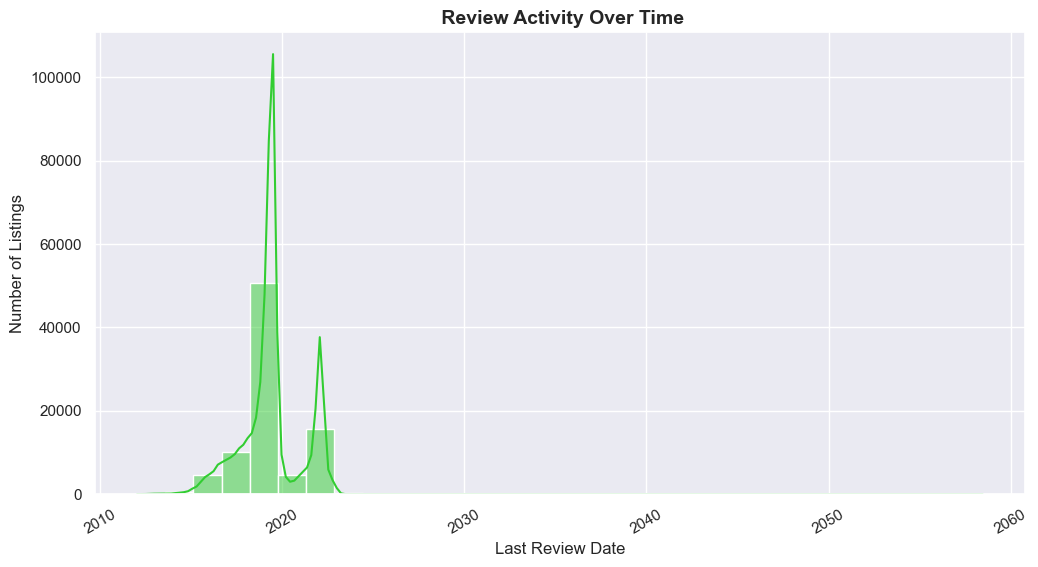


**Graph 2 Description:**
 - This histogram shows the distribution of last review dates for listings.
 - Peaks in the graph indicate periods of high guest activity.
 - A higher frequency in recent months suggests strong ongoing demand.
 - If reviews decline over time, it may indicate seasonal trends or lower engagement.
 - Hosts can use this data to adjust pricing and promotions based on demand.
 - Useful for identifying off-peak and peak booking seasons.
 - Airbnb can leverage this insight to enhance user engagement strategies.



In [55]:
# Convert 'last_review' to datetime format
df["last_review"] = pd.to_datetime(df["last_review"])

# Grouping Data for Review Analysis
review_insights = df.groupby("neighbourhood_group").agg({
    "number_of_reviews": "sum",     # Total Reviews
    "reviews_per_month": "mean",    # Average Reviews per Month
    "last_review": "max"            # Most Recent Review Date
}).reset_index()

#  **Visualization 1: Total Reviews & Reviews Per Month**
fig, ax1 = plt.subplots(figsize=(12, 6))

sb.barplot(data=review_insights, x="neighbourhood_group", y="number_of_reviews", ax=ax1, color="#4C72FF", alpha=0.7, label="Total Reviews")
ax2 = ax1.twinx()
sb.lineplot(data=review_insights, x="neighbourhood_group", y="reviews_per_month", ax=ax2, color="red", marker="o", linewidth=2, label="Avg Reviews/Month")

# Labels & Title
ax1.set_ylabel("Total Reviews", color="#4C72FF", fontsize=12)
ax2.set_ylabel("Avg Reviews per Month", color="red", fontsize=12)
ax1.set_xlabel("Neighbourhood Group", fontsize=12)
plt.title(" Reviews Insights by Neighbourhood Group", fontsize=14, fontweight="bold")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

discription="""
 **Graph 1 Description:**
 - This graph shows the total number of reviews for each neighborhood group (bars).
 - The red line represents the average reviews per month, indicating engagement levels.
 - A higher number of total reviews suggests a popular neighborhood among guests.
 - If avg reviews per month are high, it means consistent bookings and reviews.
 - Some areas may have high total reviews but low recent activity.
 - Useful for hosts to optimize pricing and marketing strategies.
 - Helps Airbnb understand which areas have the most active guests.
"""
print(discription)

#  **Visualization 2: Review Activity Over Time**
plt.figure(figsize=(12, 6))
sb.histplot(df["last_review"].dropna(), bins=30, kde=True, color="#32CD32")
plt.xlabel("Last Review Date")
plt.ylabel("Number of Listings")
plt.title(" Review Activity Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=30)
plt.show()

discription2="""
**Graph 2 Description:**
 - This histogram shows the distribution of last review dates for listings.
 - Peaks in the graph indicate periods of high guest activity.
 - A higher frequency in recent months suggests strong ongoing demand.
 - If reviews decline over time, it may indicate seasonal trends or lower engagement.
 - Hosts can use this data to adjust pricing and promotions based on demand.
 - Useful for identifying off-peak and peak booking seasons.
 - Airbnb can leverage this insight to enhance user engagement strategies.
"""
print(discription2)

In [56]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [57]:
# Grouping by host_id and getting the max listings count per host
top_hosts = df.groupby("host_id")["calculated_host_listings_count"].max().reset_index()

# Sorting in descending order to get the top 10 hosts
top_hosts = top_hosts.sort_values(by="calculated_host_listings_count", ascending=False).head(10)

# Displaying the top 10 hosts
print(top_hosts)

           host_id  calculated_host_listings_count
7162    6866703084                             332
92959  90177049292                             332
83403  80832323346                             332
78756  76431087156                             332
55263  53394556356                             332
46919  45153317531                             332
74881  72619494405                             332
72565  70352033029                             332
32927  31759913186                             332
54609  52760110374                             332


In [58]:
df.isnull().sum()

id                                    0
NAME                                  0
host_id                               0
host_identity_verified                0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
country_code                          0
instant_bookable                      0
cancellation_policy                   0
room_type                             0
Construction_year                     0
price                                 0
service_fee                           0
minimum_nights                        0
number_of_reviews                     0
last_review                       15857
reviews_per_month                     0
review_rate_number                    0
calculated_host_listings_count        0
availability_365                      0
house_rules                           0


In [59]:
import folium
from folium.plugins import HeatMap

# Convert 'lat' & 'long' to numeric & remove non-numeric values
df["lat"] = pd.to_numeric(df["lat"], errors="coerce")  # Converts non-numeric to NaN
df["long"] = pd.to_numeric(df["long"], errors="coerce")

# Drop rows with missing lat/long values
df = df.dropna(subset=["lat", "long"])

# Create Map
map_center = [df["lat"].mean(), df["long"].mean()]
heatmap = folium.Map(location=map_center, zoom_start=12)

# Add Heatmap Layer
HeatMap(df[['lat', 'long']].values, radius=15, blur=15, max_zoom=1).add_to(heatmap)
description = """
 -This heatmap represents the density of listings based on latitude and longitude coordinates.
 -Darker areas indicate higher concentration of listings, whereas lighter areas have fewer listings.
 -This visualization helps identify popular areas for Airbnb listings.
 -Central locations often have more density due to high demand.
 -Useful for understanding which neighborhoods have more listings and potential hotspots.
 -Can be used to analyze business growth and investment opportunities in different areas.
"""

# Print Description
print(description)
# Show Map
heatmap




 -This heatmap represents the density of listings based on latitude and longitude coordinates.
 -Darker areas indicate higher concentration of listings, whereas lighter areas have fewer listings.
 -This visualization helps identify popular areas for Airbnb listings.
 -Central locations often have more density due to high demand.
 -Useful for understanding which neighborhoods have more listings and potential hotspots.
 -Can be used to analyze business growth and investment opportunities in different areas.



In [60]:
df.columns

Index(['id', 'NAME', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'Construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


neighbourhood_group: Brooklyn


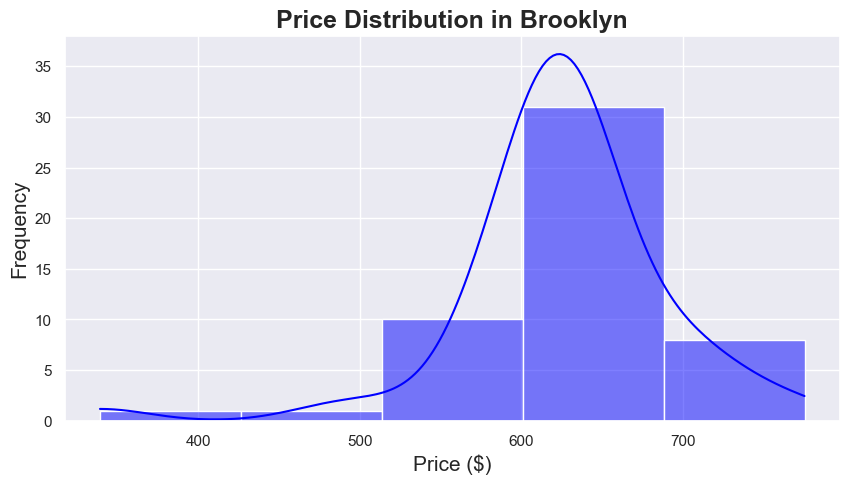

In [124]:
print(df.neighbourhood_group.unique())
ng=input("neighbourhood_group:")
result=df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
result1=result[result['neighbourhood_group']==ng]
result1
plt.figure(figsize=(10, 5))
sb.histplot(result1['price'], bins=5, kde=True, color='blue') 
plt.title(f"Price Distribution in {ng}", fontsize=18, fontweight="bold")
plt.xlabel("Price ($)",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# Final Summary and Results

📌 FINAL ANALYSIS SUMMARY
Total Listings Analyzed: 102329

Top 5 Expensive Neighborhoods (by avg. price):
 neighbourhood
SoWo                      1148.0
New Dorp                  1045.0
Chelsea, Staten Island    1042.0
Fort Wadsworth            1024.0
Manhattan valley           892.0
Name: price, dtype: float64

Room Type Distribution:
 room_type
Entire home/apt    53575
Private room       46418
Shared room         2220
Hotel room           116
Name: count, dtype: int64

Correlation between Availability and Price: -0.00


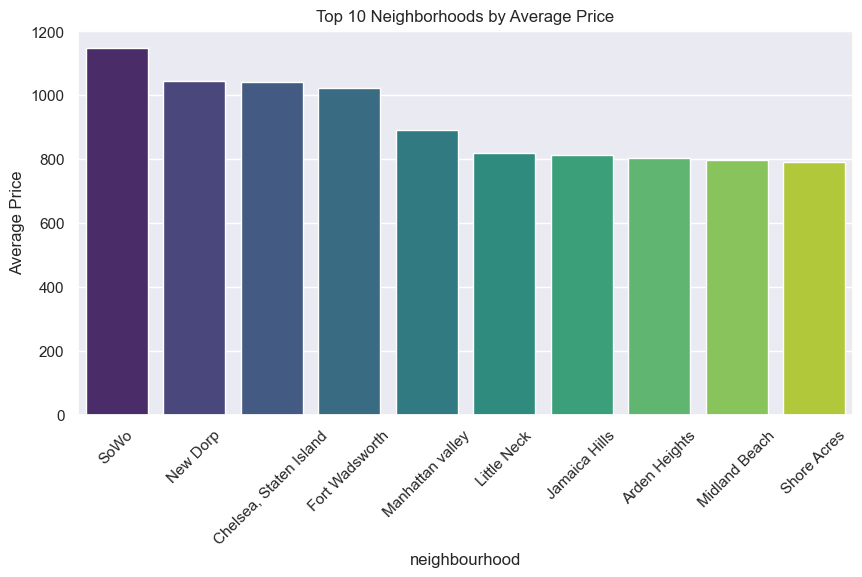

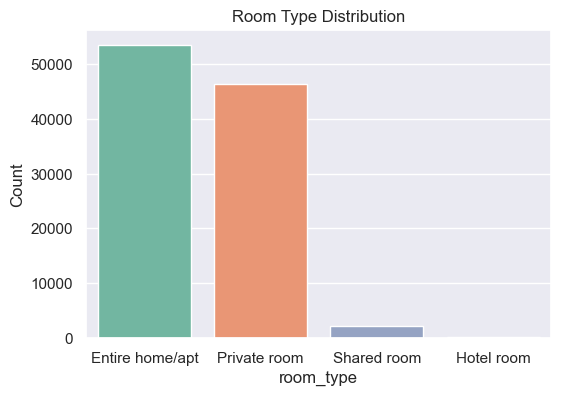


💡 BUSINESS INSIGHTS
1. 'SoWo' is the most expensive area with an average price of 1148.00.
   → Good for premium property investments.
2. 'Lighthouse Hill' is the cheapest area with an average price of 107.67.
   → Opportunity for budget-friendly stays.
3. The most common room type is 'Entire home/apt'.
   → Guests prefer full privacy.
4. Weak correlation (-0.00) between price and availability.
   → Price does not strongly affect availability.


In [126]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average price per neighborhood
avg_price = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)

# 2. Room type distribution
room_dist = df["room_type"].value_counts()

# 3. Availability vs Price correlation
availability_corr = df["availability_365"].corr(df["price"])

# --- Display Results ---
print("📌 FINAL ANALYSIS SUMMARY")
print("="*50)
print(f"Total Listings Analyzed: {len(df)}")
print("\nTop 5 Expensive Neighborhoods (by avg. price):\n", avg_price.head(5))
print("\nRoom Type Distribution:\n", room_dist)
print(f"\nCorrelation between Availability and Price: {availability_corr:.2f}")


# Neighborhood average price
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.index[:10], y=avg_price.values[:10], palette="viridis")
plt.title("Top 10 Neighborhoods by Average Price")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

# Room type distribution
plt.figure(figsize=(6,4))
sns.barplot(x=room_dist.index, y=room_dist.values, palette="Set2")
plt.title("Room Type Distribution")
plt.ylabel("Count")
plt.show()

print("\n💡 BUSINESS INSIGHTS")
print("="*50)

# Insight 1: Expensive neighborhoods
top_area = avg_price.index[0]
top_price = avg_price.iloc[0]
print(f"1. '{top_area}' is the most expensive area with an average price of {top_price:.2f}.")
print("   → Good for premium property investments.")

# Insight 2: Cheapest neighborhoods
low_area = avg_price.index[-1]
low_price = avg_price.iloc[-1]
print(f"2. '{low_area}' is the cheapest area with an average price of {low_price:.2f}.")
print("   → Opportunity for budget-friendly stays.")

# Insight 3: Room type trend
top_room = room_dist.index[0]
print(f"3. The most common room type is '{top_room}'.")
if "Entire home" in top_room:
    print("   → Guests prefer full privacy.")
elif "Private room" in top_room:
    print("   → Guests are price-sensitive but want privacy.")
else:
    print("   → Shared spaces are less popular.")

# Insight 4: Availability vs Price
if availability_corr > 0.2:
    print(f"4. Positive correlation ({availability_corr:.2f}) between price and availability.")
    print("   → Expensive listings stay available longer (less demand).")
elif availability_corr < -0.2:
    print(f"4. Negative correlation ({availability_corr:.2f}) between price and availability.")
    print("   → Cheaper listings get booked more often.")
else:
    print(f"4. Weak correlation ({availability_corr:.2f}) between price and availability.")
    print("   → Price does not strongly affect availability.")
